In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
print(os.getcwd())

/home/bishnu/project/EDA_Customer_churn/notebooks


In [5]:

df = pd.read_csv('/home/bishnu/project/EDA_Customer_churn/data/cleaned_data.csv')

In [8]:
df.shape

(7043, 21)

In [6]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4757,1582-RAFML,Male,0,No,No,1,Yes,Yes,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.10,60.10,Yes
5615,1493-AMTIE,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.20,20.20,Yes
1434,1571-SAVHK,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,99.95,1132.75,Yes
5704,0168-XZKBB,Female,0,Yes,No,19,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.85,1564.40,No
6556,0661-KQHNK,Female,0,Yes,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.00,105.50,No


In [7]:
df["customerID"].nunique()

7043

## Is there any relationship between churn rate and gender of customer?

In [10]:
df.groupby("gender")["Churn"].value_counts()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64

In [11]:
from scipy.stats import chi2_contingency

def chi2_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi2: {chi2}, p-value: {p}, dof: {dof}")
    if p < 0.05:
        print(f"Reject null hypothesis: {col1} and {col2} are dependent")
    else:
        print(f"Fail to reject null hypothesis: {col1} and {col2} are independent")

In [24]:
def plot_heatmap(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2],normalize='index')
    sns.heatmap(contingency_table, annot=True,cmap='Blues',)
    plt.title(f"Heatmap of {col1} vs {col2}")
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.savefig(f"/home/bishnu/project/EDA_Customer_churn/visuals/heatmap_{col1}_{col2}.png",dpi=300)
    plt.show()

In [ ]:
# cramers_v test to check the strength of association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def cramers_v_test(df, col1, col2):
    cv = cramers_v(df[col1], df[col2])
    print(f"Cramer's V: {cv}")
    if cv < 0.1:
        print(f"Very weak association between {col1} and {col2}")
    elif cv < 0.3:
        print(f"Weak association between {col1} and {col2}")
    elif cv < 0.5:
        print(f"Moderate association between {col1} and {col2}")
    elif cv < 0.7:
        print(f"Strong association between {col1} and {col2}")
    else:
        print(f"Very strong association between {col1} and {col2}")

In [26]:
path = "/home/bishnu/project/EDA_Customer_churn/visuals/"

In [13]:
chi2_test(df, "gender", "Churn")

Chi2: 0.4840828822091383, p-value: 0.48657873605618596, dof: 1
Fail to reject null hypothesis: gender and Churn are independent


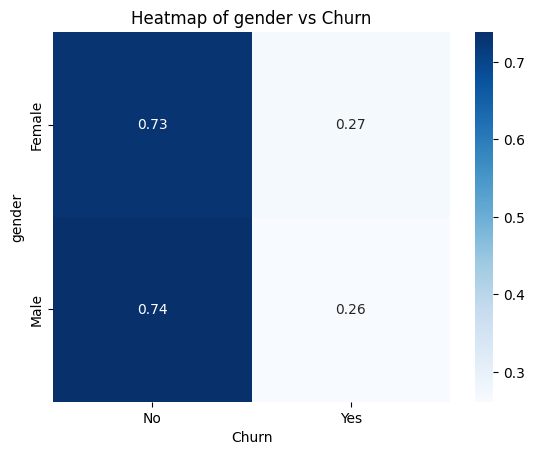

In [25]:
plot_heatmap(df, "gender", "Churn")

* There is no significance difference between male and female based on churn rate. i.e churn is not dependent on gender.

## How does churn vary by contract type?

In [28]:
df["Contract"].value_counts(  normalize=True)

Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

In [30]:
df.groupby("Contract")["Churn"].value_counts(normalize=True)

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64

In [31]:
chi2_test(df, "Contract", "Churn")

Chi2: 1184.5965720837926, p-value: 5.863038300673391e-258, dof: 2
Reject null hypothesis: Contract and Churn are dependent


In [ ]:
cramers_v_test(df, "Contract", "Churn")

Cramer's V: 0.0
Very weak association between gender and Churn


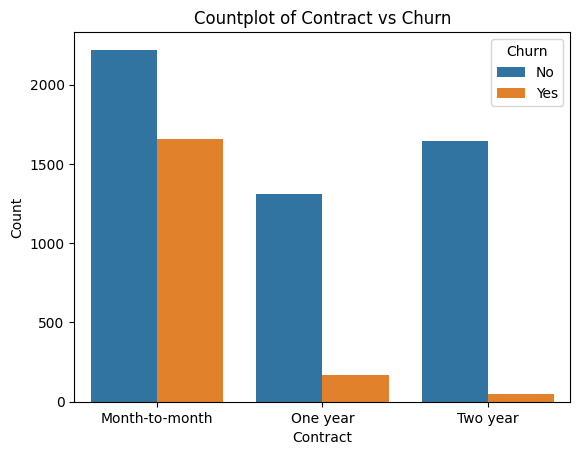

In [35]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Countplot of Contract vs Churn")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.savefig(f"{path}countplot_Contract_Churn.png", dpi=300)
plt.show()

* Users having Month-to-Month contract are more prone to churn.
* Around 0.43% of users having Month-to-Month contract are flagged to churn followed by One year (0.11%).
* There is moderate association between Contract and Churn column, determined by Chi-square test, backed up by Cravers's test.

## Is there a relationship between tenure and churn?

In [36]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

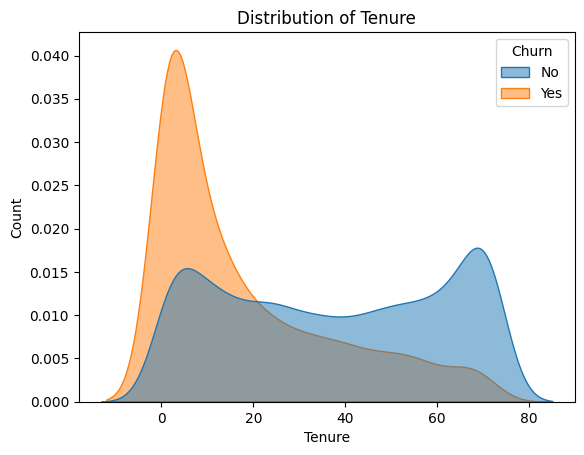

In [49]:
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.savefig(f"{path}Kdeplot_tenure.png", dpi=300)
plt.show()

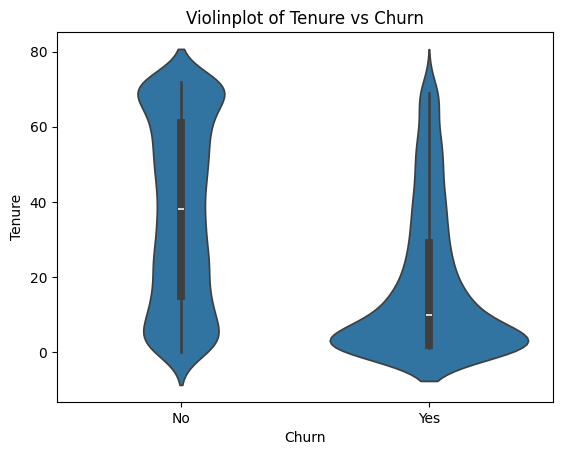

In [44]:
sns.violinplot(x="Churn", y="tenure", data=df)
plt.title("Violinplot of Tenure vs Churn")
plt.xlabel("Churn") 
plt.ylabel("Tenure")
plt.savefig(f"{path}violinplot_tenure_Churn.png", dpi=300)
plt.show()

In [54]:
df[df["tenure"] < 22]["Churn"].value_counts()

Churn
No     1673
Yes    1268
Name: count, dtype: int64

In [55]:
df[df["tenure"] > 22]["Churn"].value_counts()

Churn
No     3438
Yes     574
Name: count, dtype: int64

In [57]:

from scipy.stats import mannwhitneyu
def mannwhitneyu_test(df, col1,col2):
    churned = df[df['Churn'] == 'Yes'][col1]
    not_churned = df[df['Churn'] == 'No'][col1]
    
    stat, p = mannwhitneyu(churned, not_churned, alternative='two-sided')
    
    print(f"Mann-Whitney U Test Statistic: {stat}")
    print(f"P-value: {p}")
    
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis: distributions are significantly different.")
    else:
        print("Fail to reject the null hypothesis: no significant difference in distributions.")

In [58]:
mannwhitneyu_test(df, "tenure", "Churn")

Mann-Whitney U Test Statistic: 2515538.0
P-value: 2.419635517951866e-208
Reject the null hypothesis: distributions are significantly different.


* This comparison shows that the customers having tenure less than 22 months are more likely to churn.
* 1268 out of 1869 churn customers belongd to tenure less than 22 category.
* Mann-Whitney U test shows the distribution of tenure per churn category is significantly different. 

## Does monthly charge (MonthlyCharges) affect churn probability?

## Does gender or senior citizenship influence churn?

## How does the presence of dependents or partners impact churn?

## What is the distribution of service usage across customers?

## Do customers with multiple services churn less or more?

## What payment methods are most common among churned customers?

## Is there a correlation between TotalCharges and Churn?